In [ ]:
!nvidia-smi

Sat Jun 22 14:57:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [17]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-06-27 23:33:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-27 23:33:17 (86.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [18]:
# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

101 Food Classes: Working with all data

In [2]:
# Get 100% of the data of the 10 classes
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2024-06-27 23:19:47--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2024-06-27 23:19:47--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  25.4MB/s    in 3m 12s  

2024-06-27 23:23:00 (24.9 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [3]:
# Helper function to download data and extract
import os
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [4]:
# Download data and extract it to folder
get_data_extract()

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/

In [5]:
# Check the extracted dataset folder
!ls food-101/images

apple_pie	    crab_cakes		     gyoza		    poutine
baby_back_ribs	    creme_brulee	     hamburger		    prime_rib
baklava		    croque_madame	     hot_and_sour_soup	    pulled_pork_sandwich
beef_carpaccio	    cup_cakes		     hot_dog		    ramen
beef_tartare	    deviled_eggs	     huevos_rancheros	    ravioli
beet_salad	    donuts		     hummus		    red_velvet_cake
beignets	    dumplings		     ice_cream		    risotto
bibimbap	    edamame		     lasagna		    samosa
bread_pudding	    eggs_benedict	     lobster_bisque	    sashimi
breakfast_burrito   escargots		     lobster_roll_sandwich  scallops
bruschetta	    falafel		     macaroni_and_cheese    seaweed_salad
caesar_salad	    filet_mignon	     macarons		    shrimp_and_grits
cannoli		    fish_and_chips	     miso_soup		    spaghetti_bolognese
caprese_salad	    foie_gras		     mussels		    spaghetti_carbonara
carrot_cake	    french_fries	     nachos		    spring_rolls
ceviche		    french_onion_soup	     omelette		    steak
cheesecake	    french_toas

In [6]:
import os
os.listdir('food-101/images')

['gyoza',
 'french_toast',
 'hot_and_sour_soup',
 'hummus',
 'deviled_eggs',
 'beignets',
 'greek_salad',
 'carrot_cake',
 'tacos',
 'fried_calamari',
 'filet_mignon',
 'baklava',
 'cheese_plate',
 'tuna_tartare',
 'sushi',
 'fried_rice',
 'apple_pie',
 'clam_chowder',
 'grilled_salmon',
 'samosa',
 'sashimi',
 'beet_salad',
 'lasagna',
 'fish_and_chips',
 'caesar_salad',
 'gnocchi',
 'bibimbap',
 'chicken_curry',
 'baby_back_ribs',
 'eggs_benedict',
 'churros',
 'beef_carpaccio',
 'donuts',
 'panna_cotta',
 'chicken_quesadilla',
 'guacamole',
 'lobster_roll_sandwich',
 'peking_duck',
 'pizza',
 'pancakes',
 'mussels',
 'french_onion_soup',
 'chicken_wings',
 'bruschetta',
 'cup_cakes',
 'chocolate_mousse',
 'takoyaki',
 'garlic_bread',
 'cheesecake',
 'foie_gras',
 'onion_rings',
 'nachos',
 'club_sandwich',
 'bread_pudding',
 'hamburger',
 'shrimp_and_grits',
 'scallops',
 'huevos_rancheros',
 'creme_brulee',
 'waffles',
 'pulled_pork_sandwich',
 'steak',
 'red_velvet_cake',
 'miso_s

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os

In [8]:
# Helper method to split dataset into train and test folders
from shutil import copy
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [9]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [10]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [11]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find food-101/train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [12]:
# Check how many files are in the train folder
print("Total number of samples in test folder")
!find food-101/test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


In [13]:
# Create training and test directories
train_dir = "food-101/train/"
test_dir = "food-101/test/"

In [14]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 75750 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [15]:
y_true_list = []
for images, labels in test_data:
    y_true_list.extend(labels.numpy())

# Convert to a NumPy array if needed
y_true = np.array(y_true_list)

##Buidling the base model_0

In [19]:
import tensorflow as tf
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# OLD
# base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNetV2
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNetV2 inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(101, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

from tensorflow.keras.metrics import TopKCategoricalAccuracy, Precision, Recall
# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy", TopKCategoricalAccuracy(k=5), Precision(), Recall()])

# 10. Fit the model (we use less steps for validation so it's faster)
history_0 = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(1.0 * len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "All 101 dataset classes")])


Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/All 101 dataset classes/20240627-233344
Epoch 1/5
2368/2368 [==============================] - 265s 106ms/step - loss: 1.8375 - accuracy: 0.5551 - top_k_categorical_accuracy: 0.8037 - precision_1: 0.8767 - recall_1: 0.3213 - val_loss: 1.1734 - val_accuracy: 0.6899 - val_top_k_categorical_accuracy: 0.9024 - val_precision_1: 0.8962 - val_recall_1: 0.5209
Epoch 2/5
2368/2368 [==============================] - 263s 111ms/step - loss: 1.3186 - accuracy: 0.6583 - top_k_categorical_accuracy: 0.8772 - precision_1: 0.8698 - recall_1: 0.5014 - val_loss: 1.0532 - val_accuracy: 0.7170 - val_top_k_categorical_accuracy: 0.9154 - val_precision_1: 0.8882 - val_recall_1: 0.5803
Epoch 3/5
2368/2368 [==============================] - 247s 104ms/step - loss: 1.1855 - accuracy: 0.6895 - top_k_categorical_accuracy: 0.8948 - precision_1: 0.8769 - recall_1: 0.5522 - val_lo

In [21]:
#Evaluate the model
test_loss, test_accuracy, test_top5_accuracy, test_precision, test_recall = model_0.evaluate(test_data)

790/790 [==============================] - 54s 68ms/step - loss: 0.9615 - accuracy: 0.7379 - top_k_categorical_accuracy: 0.9245 - precision_1: 0.8764 - recall_1: 0.6361


In [22]:
y_pred_probs = model_0.predict(test_data)

y_pred = np.argmax(y_pred_probs, axis=1)


790/790 [==============================] - 58s 71ms/step


In [24]:
y_pred

array([40, 43,  7, ..., 37,  8, 37])

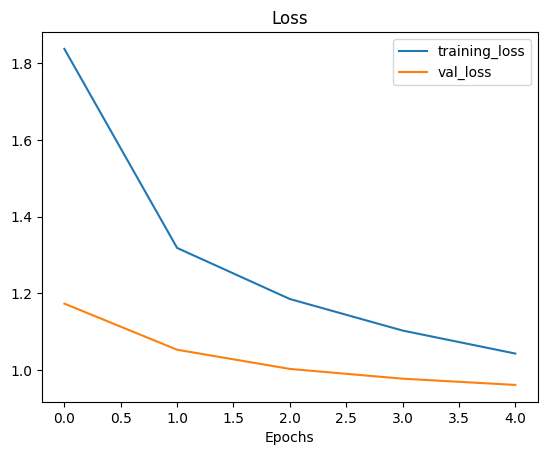

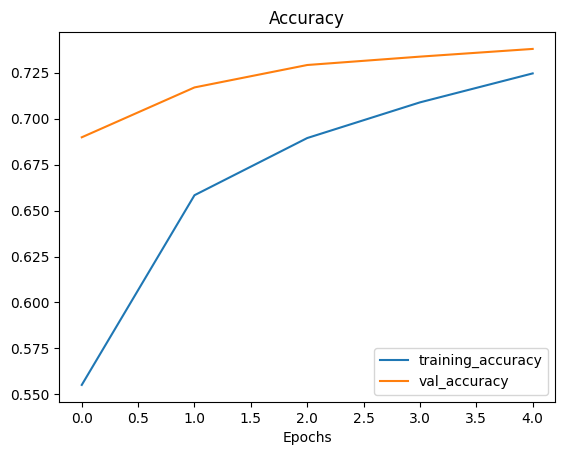

In [25]:
#how does our model training curve looks like
plot_loss_curves(history_0)

In [ ]:
#We need to fine-tune our model for better results. However, we need to set early stopping callback and ModelCheckPoint callback to stop
#running when model stop improving
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss, patience = 3")

#Create the ModelCheckpoint
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [ ]:
#We need to create the ReduceLROnPlateau to adjust our learning rate when necessary
#Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_lr = 1e-7)

##Model 1: Fine Tunning the base model
Note: that all the layers of the EfficientNet model were frozen during training. In this experiment, we are going to be fine-tunning the base model. This means that, we are going to unfreeze part of the layers of the base model. Let's see the base model layers

In [37]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [38]:
#Set all layers to trainable
base_model.trainable = True

#Freeeze all layers except the first 100
for layer in base_model.layers[:-50]:
  layer.trainable = False

In [39]:
#check layers that are trainable
# What layers in the model are trainable?
# Check which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [40]:
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy", TopKCategoricalAccuracy(k=5), Precision(), Recall()])

# 10. Fit the model (we use less steps for validation so it's faster)
history_1 = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(1.0 * len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "All 101 dataset classes")])

Saving TensorBoard log files to: transfer_learning/All 101 dataset classes/20240628-000635
Epoch 1/5
2368/2368 [==============================] - 266s 106ms/step - loss: 1.1033 - accuracy: 0.7055 - top_k_categorical_accuracy: 0.9069 - precision_2: 0.8569 - recall_2: 0.5977 - val_loss: 0.7889 - val_accuracy: 0.7811 - val_top_k_categorical_accuracy: 0.9448 - val_precision_2: 0.8752 - val_recall_2: 0.7145
Epoch 2/5
2368/2368 [==============================] - 241s 102ms/step - loss: 0.8054 - accuracy: 0.7792 - top_k_categorical_accuracy: 0.9424 - precision_2: 0.8908 - recall_2: 0.6953 - val_loss: 0.7517 - val_accuracy: 0.7901 - val_top_k_categorical_accuracy: 0.9486 - val_precision_2: 0.8756 - val_recall_2: 0.7326
Epoch 3/5
2368/2368 [==============================] - 228s 96ms/step - loss: 0.6253 - accuracy: 0.8246 - top_k_categorical_accuracy: 0.9623 - precision_2: 0.9112 - recall_2: 0.7533 - val_loss: 0.7477 - val_accuracy: 0.7948 - val_top_k_categorical_accuracy: 0.9495 - val_precisio

In [41]:
# Evaluate fine-tuned model on the whole test dataset
test_loss, test_accuracy, test_top5_accuracy, test_precision, test_recall = model_0.evaluate(test_data)

790/790 [==============================] - 60s 75ms/step - loss: 0.7817 - accuracy: 0.7966 - top_k_categorical_accuracy: 0.9482 - precision_2: 0.8554 - recall_2: 0.7655


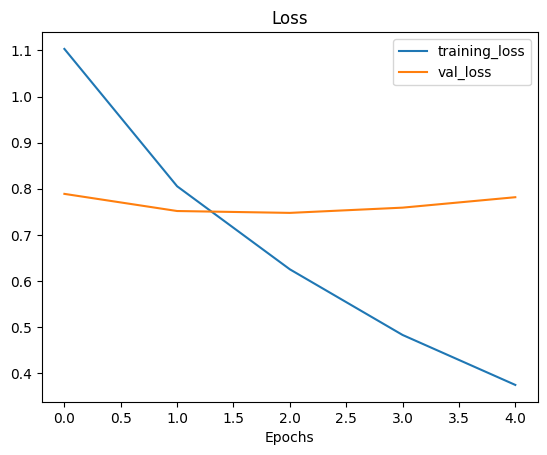

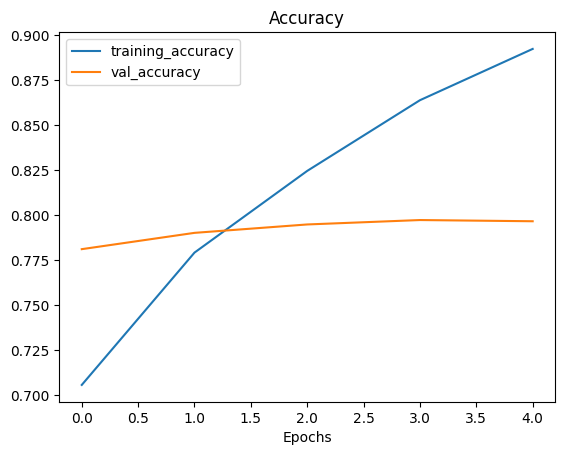

In [42]:
#how does our model training curve looks like
plot_loss_curves(history_1)

##Fine tune Model 2

In [43]:
#Set all layers to trainable
base_model.trainable = True

#Freeeze all layers except the first 100
for layer in base_model.layers[:-100]:
  layer.trainable = False

In [44]:
#check layers that are trainable
# What layers in the model are trainable?
# Check which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy", TopKCategoricalAccuracy(k=5), Precision(), Recall()])

# 10. Fit the model (we use less steps for validation so it's faster)
history_2 = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(1.0 * len(test_data)),
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "All 101 dataset classes")])

Saving TensorBoard log files to: transfer_learning/All 101 dataset classes/20240628-002922
Epoch 1/5
2368/2368 [==============================] - 289s 113ms/step - loss: 0.4841 - accuracy: 0.8565 - top_k_categorical_accuracy: 0.9783 - precision_3: 0.9178 - recall_3: 0.8040 - val_loss: 0.7671 - val_accuracy: 0.7985 - val_top_k_categorical_accuracy: 0.9509 - val_precision_3: 0.8567 - val_recall_3: 0.7682
Epoch 2/5
1632/2368 [===================>..........] - ETA: 1:06 - loss: 0.3200 - accuracy: 0.9056 - top_k_categorical_accuracy: 0.9901 - precision_3: 0.9449 - recall_3: 0.8671

In [ ]:
# Evaluate fine-tuned model on the whole test dataset
test_loss, test_accuracy, test_top5_accuracy, test_precision, test_recall = model_0.evaluate(test_data)

In [ ]:
#how does our model training curve looks like
plot_loss_curves(history_2)

In [ ]:
y_pred_probs = model_0.predict(test_data)

y_pred = np.argmax(y_pred_probs, axis=1)